
---

## 📘 사용 안내서

### 📂 필수 파일 및 경로 구조

프로그램이 정상적으로 실행되기 위해서는 아래와 같은 파일 및 디렉터리 구조가 필요합니다.

```
project_root/
├── datasets_fin/
│   ├── train.csv           # 학습용 메타데이터 파일
│   ├── train/              # 학습 이미지 폴더
│   │   ├── image_0001.jpg
│   │   ├── image_0002.jpg
│   │   └── ...
│   └── test/               # 테스트 이미지 폴더
│       ├── image_1001.jpg
│       ├── image_1002.jpg
│       └── ...
```

---

### ⚙️ 경로 설정

* 기본적으로 `datasets_fin/` 폴더를 기준으로 작동합니다.
* 필요에 따라 경로를 사용자 지정할 수 있습니다.

---

### 🚨 주의사항

* `datasets_fin/train.csv` 파일이 **현재 작업 디렉터리**에 존재해야 합니다.
* `train/` 및 `test/` 폴더에는 각각의 이미지 파일이 포함되어 있어야 합니다.
* 경로나 파일명이 다를 경우, 코드 내 경로를 수정해야 합니다.

---



In [28]:
import os
import random

import pandas as pd
import numpy as np
import seaborn as sns

from PIL import Image
import matplotlib.pyplot as plt


# Reset to default font
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

print("✅ Font reset to default (DejaVu Sans)")

✅ Font reset to default (DejaVu Sans)


In [29]:
def random_seed(seed):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    

random_seed(42)

In [30]:
train_df = pd.read_csv('datasets_fin/train.csv')
print(train_df.head())

                     ID  target
0  002f99746285dfdd.jpg      16
1  008ccd231e1fea5d.jpg      10
2  008f5911bfda7695.jpg      10
3  009235e4c9c07af5.jpg       4
4  00b2f44967580c74.jpg      16


In [31]:
train_df['target'].value_counts()

target
16    100
10    100
0     100
3     100
12    100
8     100
2     100
11    100
7     100
9     100
15    100
5     100
4     100
6     100
13     74
14     50
1      46
Name: count, dtype: int64

In [32]:
train_dir = 'datasets_fin/train'
test_dir = 'datasets_fin/test'

# CSV에 기록된 이미지 수 vs 실제 파일 수 비교
csv_imgs = set(train_df['ID'])
actual_imgs = set(os.listdir(train_dir))

missing = csv_imgs - actual_imgs
extra = actual_imgs - csv_imgs

print("CSV에 있지만 폴더에 없는 이미지:", len(missing))
print("폴더에 있지만 CSV에 없는 이미지:", len(extra))

CSV에 있지만 폴더에 없는 이미지: 0
폴더에 있지만 CSV에 없는 이미지: 0


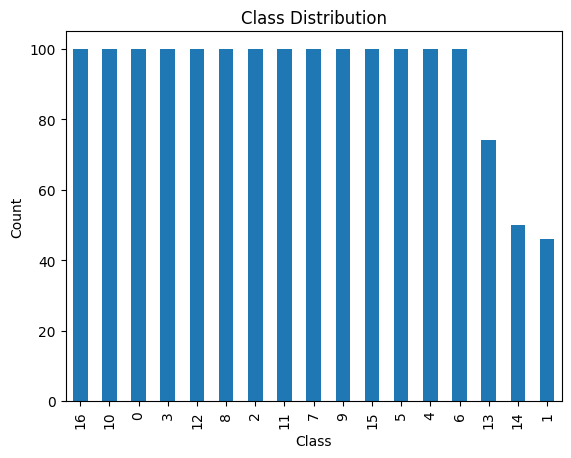

In [33]:
train_df['target'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [34]:
sample_imgs = random.sample(os.listdir(train_dir), 5)

for img_name in sample_imgs:
    img_path = os.path.join(train_dir, img_name)
    img = Image.open(img_path)
    print(img_name, img.size, img.mode) 

6bd9b10df1a9e223.jpg (443, 591) RGB
abcadd0c3e61c71a.jpg (591, 443) RGB
74a24ffce48fa35f.jpg (625, 419) RGB
d24281f1c99057fb.jpg (591, 443) RGB
ab74a4a15213ef9e.jpg (443, 591) RGB


In [35]:
broken = []
for img_name in os.listdir(train_dir):
    try:
        img = Image.open(os.path.join(train_dir, img_name))
        img.verify()
    except Exception as e:
        broken.append(img_name)

print("깨진 이미지 수:", len(broken))

깨진 이미지 수: 0


In [36]:
print("테스트 이미지 수:", len(os.listdir(test_dir)))

테스트 이미지 수: 3140


In [37]:
# 데이터프레임 기본 정보
print("=" * 50)
print("📊 Train 데이터프레임 기본 정보")
print("=" * 50)
print(f"\n데이터 shape: {train_df.shape}")
print(f"\n처음 5개 데이터:\n{train_df.head()}")
print(f"\n데이터 타입:\n{train_df.dtypes}")
print(f"\n결측치:\n{train_df.isnull().sum()}")
print(f"\n기본 통계:\n{train_df.describe()}")

📊 Train 데이터프레임 기본 정보

데이터 shape: (1570, 2)

처음 5개 데이터:
                     ID  target
0  002f99746285dfdd.jpg      16
1  008ccd231e1fea5d.jpg      10
2  008f5911bfda7695.jpg      10
3  009235e4c9c07af5.jpg       4
4  00b2f44967580c74.jpg      16

데이터 타입:
ID        object
target     int64
dtype: object

결측치:
ID        0
target    0
dtype: int64

기본 통계:
            target
count  1570.000000
mean      7.966879
std       4.770199
min       0.000000
25%       4.000000
50%       8.000000
75%      12.000000
max      16.000000


🎯 Target Distribution

Target value counts:
target
0     100
1      46
2     100
3     100
4     100
5     100
6     100
7     100
8     100
9     100
10    100
11    100
12    100
13     74
14     50
15    100
16    100
Name: count, dtype: int64

Unique target values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]


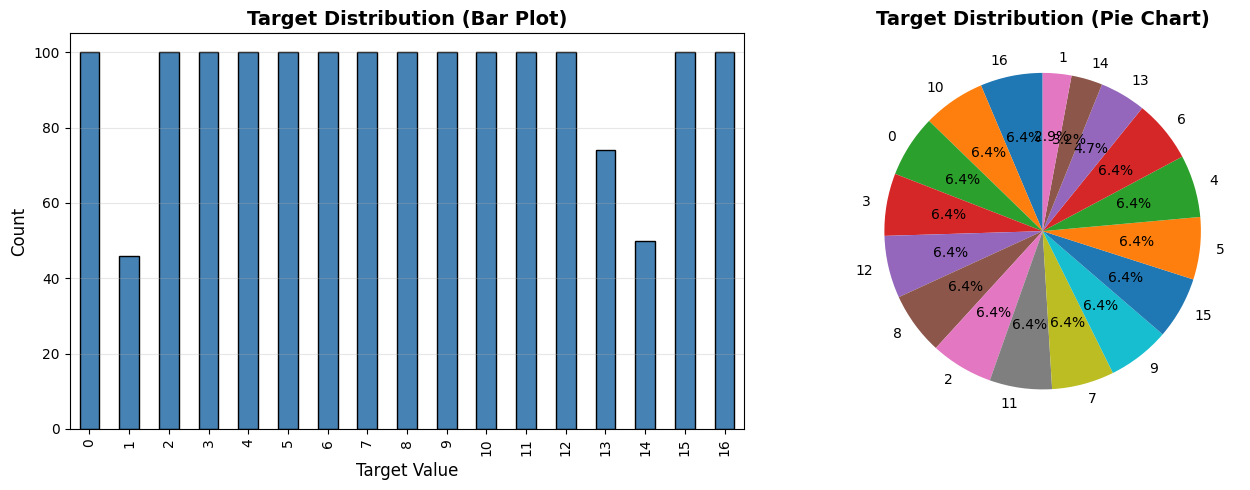


Most frequent target: 0 (count: 100)
Least frequent target: 1 (count: 46)


In [38]:
# Target distribution
print("=" * 50)
print("🎯 Target Distribution")
print("=" * 50)
print(f"\nTarget value counts:\n{train_df['target'].value_counts().sort_index()}")
print(f"\nUnique target values: {sorted(train_df['target'].unique())}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. Bar plot
train_df['target'].value_counts().sort_index().plot(kind='bar', ax=axes[0], color='steelblue', edgecolor='black')
axes[0].set_title('Target Distribution (Bar Plot)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Target Value', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)

# 2. Pie chart
target_counts = train_df['target'].value_counts()
axes[1].pie(target_counts.values, labels=target_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Target Distribution (Pie Chart)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nMost frequent target: {train_df['target'].mode()[0]} (count: {train_df['target'].value_counts().max()})")
print(f"Least frequent target: {train_df['target'].value_counts().idxmin()} (count: {train_df['target'].value_counts().min()})")

🖼️ Sample Images by Target


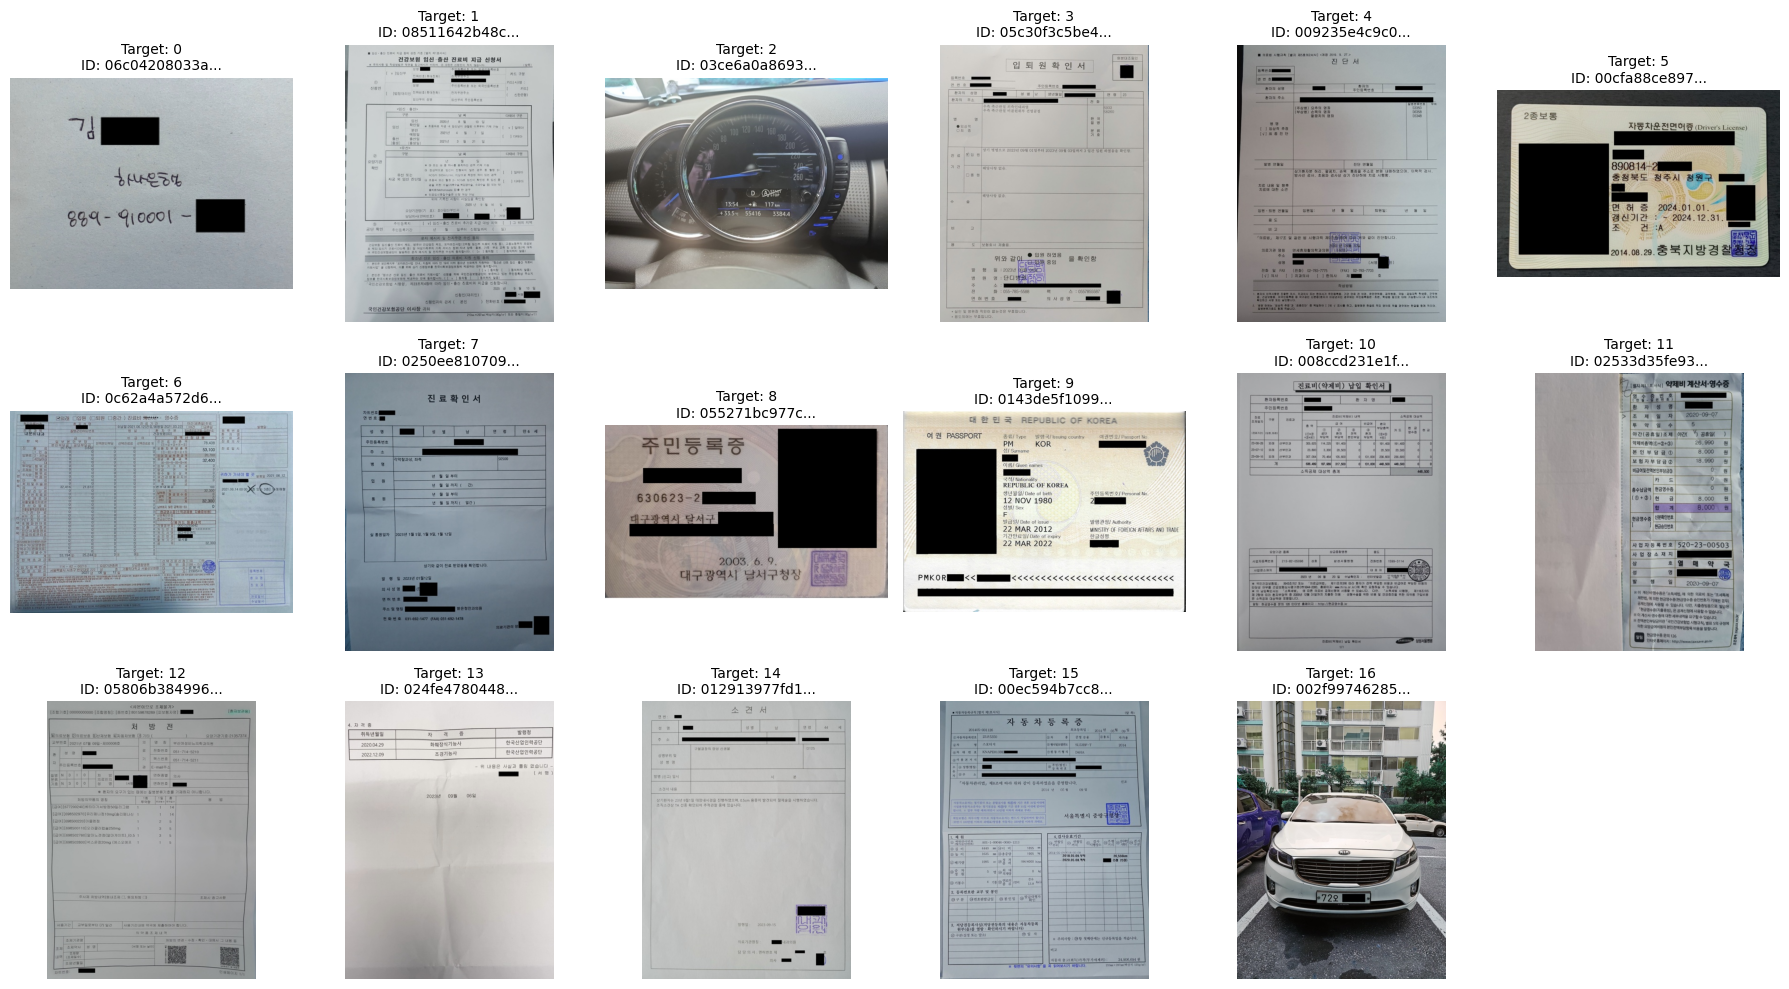


✅ Displayed 1 sample image for each target class


In [39]:
# Visualize sample images for each target
print("=" * 50)
print("🖼️ Sample Images by Target")
print("=" * 50)

# Select 1 sample per target (0-16)
fig, axes = plt.subplots(3, 6, figsize=(18, 10))
axes = axes.ravel()

for i, target_val in enumerate(sorted(train_df['target'].unique())):
    # Get one sample image for this target
    sample_id = train_df[train_df['target'] == target_val].iloc[0]['ID']
    img_path = os.path.join(train_dir, sample_id)
    
    # Load and display image
    img = Image.open(img_path)
    axes[i].imshow(img)
    axes[i].set_title(f'Target: {target_val}\nID: {sample_id[:12]}...', fontsize=10)
    axes[i].axis('off')

# Hide extra subplots
for i in range(len(train_df['target'].unique()), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

print(f"\n✅ Displayed 1 sample image for each target class")

🖼️ Sample Test Images


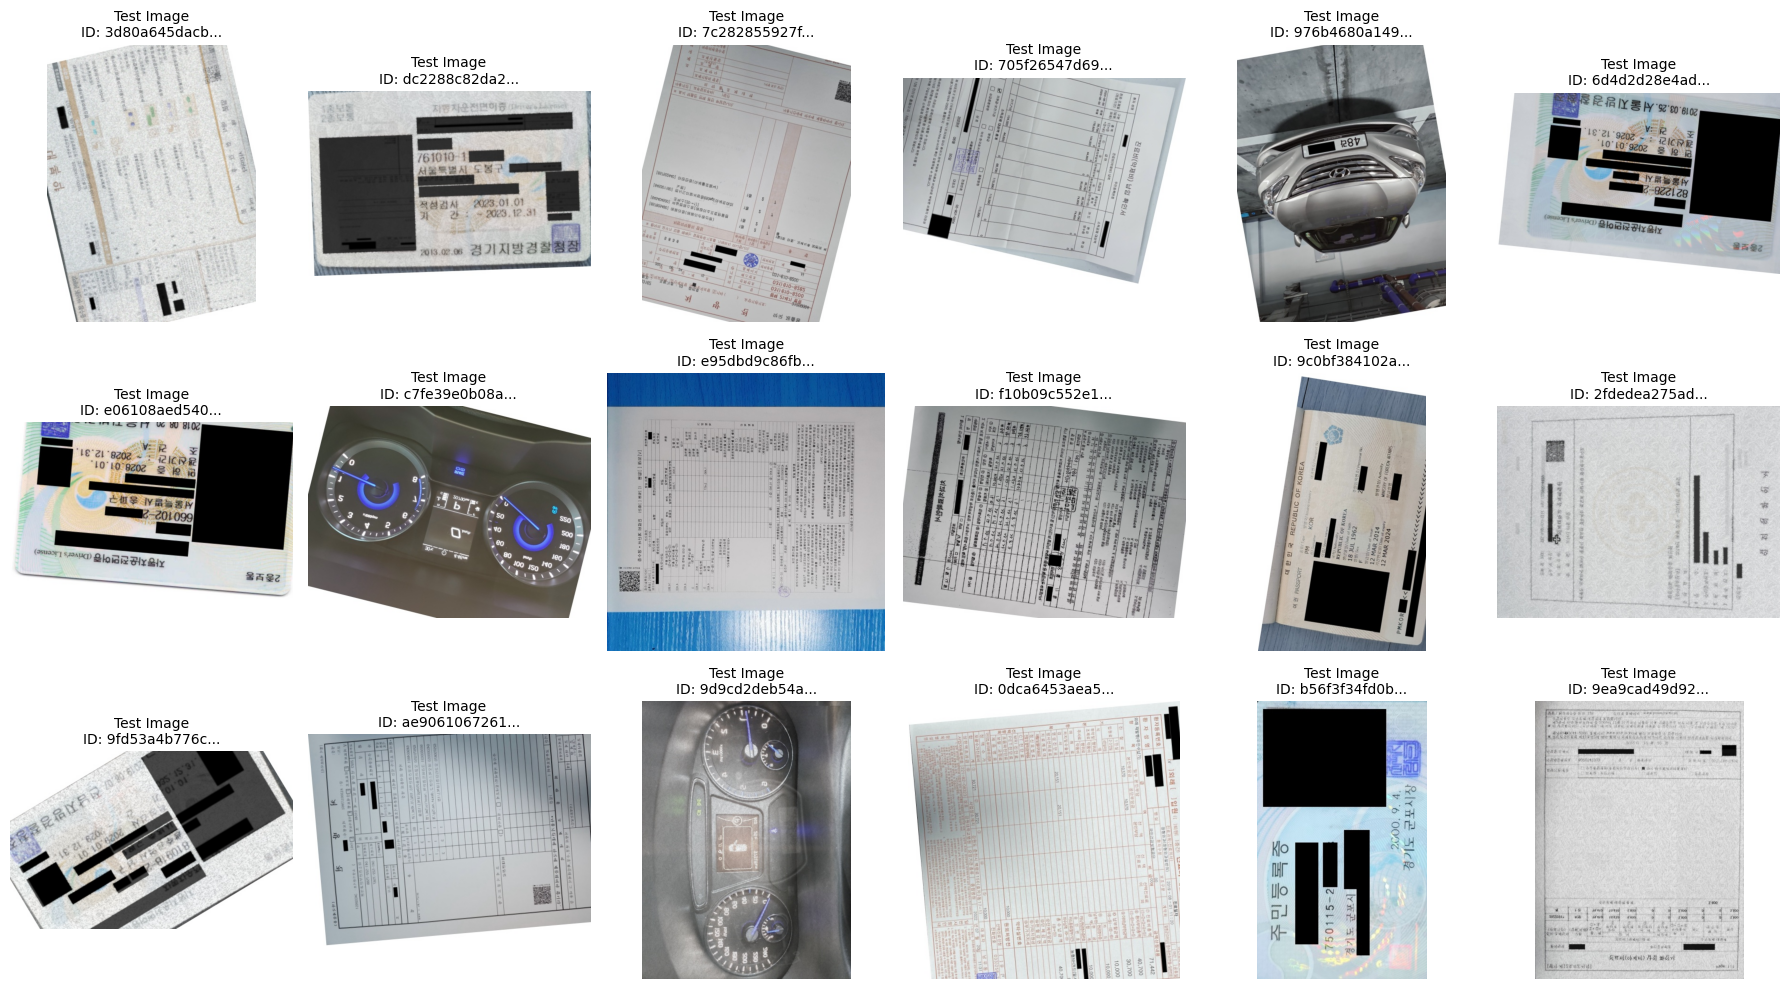


✅ Displayed 18 random test images


In [40]:
# Visualize sample TEST images
print("=" * 50)
print("🖼️ Sample Test Images")
print("=" * 50)

# Get test images and select random samples
test_images = os.listdir(test_dir)
num_samples = 18  # 3x6 grid

# Random sample
sample_test_images = np.random.choice(test_images, size=num_samples, replace=False)

fig, axes = plt.subplots(3, 6, figsize=(18, 10))
axes = axes.ravel()

for i, img_id in enumerate(sample_test_images):
    img_path = os.path.join(test_dir, img_id)
    
    # Load and display image
    img = Image.open(img_path)
    axes[i].imshow(img)
    axes[i].set_title(f'Test Image\nID: {img_id[:12]}...', fontsize=10)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

print(f"\n✅ Displayed {num_samples} random test images")

📐 Train Image Dimension Analysis (All Data)

Analyzed 1570 images

Width  - Min: 384, Max: 753, Mean: 497.6
Height - Min: 348, Max: 682, Mean: 538.2
Aspect Ratio - Min: 0.56, Max: 2.16, Mean: 0.97


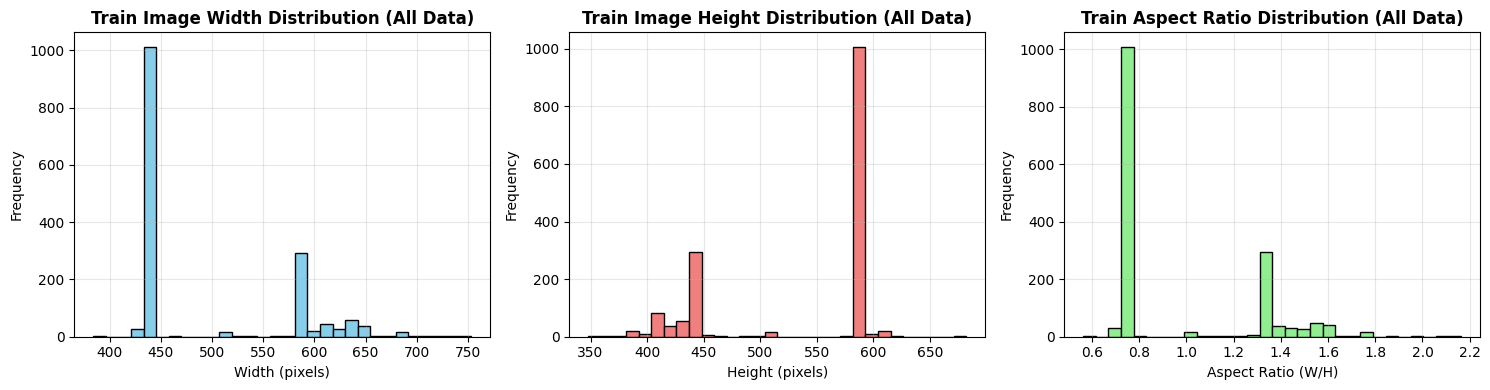

In [41]:
# Analyze ALL train image dimensions
print("=" * 50)
print("📐 Train Image Dimension Analysis (All Data)")
print("=" * 50)

widths = []
heights = []
aspects = []

# Analyze ALL train images
# iterrows() : 인덱스, 행 데이터 형태로 반환
for idx, row in train_df.iterrows():
    img_path = os.path.join(train_dir, row['ID'])
    img = Image.open(img_path)
    w, h = img.size
    widths.append(w)
    heights.append(h)
    aspects.append(w/h)

print(f"\nAnalyzed {len(train_df)} images")
print(f"\nWidth  - Min: {min(widths)}, Max: {max(widths)}, Mean: {np.mean(widths):.1f}")
print(f"Height - Min: {min(heights)}, Max: {max(heights)}, Mean: {np.mean(heights):.1f}")
print(f"Aspect Ratio - Min: {min(aspects):.2f}, Max: {max(aspects):.2f}, Mean: {np.mean(aspects):.2f}")

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].hist(widths, bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Train Image Width Distribution (All Data)', fontweight='bold')
axes[0].set_xlabel('Width (pixels)')
axes[0].set_ylabel('Frequency')
axes[0].grid(alpha=0.3)

axes[1].hist(heights, bins=30, color='lightcoral', edgecolor='black')
axes[1].set_title('Train Image Height Distribution (All Data)', fontweight='bold')
axes[1].set_xlabel('Height (pixels)')
axes[1].set_ylabel('Frequency')
axes[1].grid(alpha=0.3)

axes[2].hist(aspects, bins=30, color='lightgreen', edgecolor='black')
axes[2].set_title('Train Aspect Ratio Distribution (All Data)', fontweight='bold')
axes[2].set_xlabel('Aspect Ratio (W/H)')
axes[2].set_ylabel('Frequency')
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

📐 Test Image Dimension Analysis (All Data)

Total test images: 3140

Analyzed 3140 images

Width  - Min: 343, Max: 763, Mean: 517.1
Height - Min: 343, Max: 763, Mean: 518.6
Aspect Ratio - Min: 0.45, Max: 2.22, Mean: 1.05


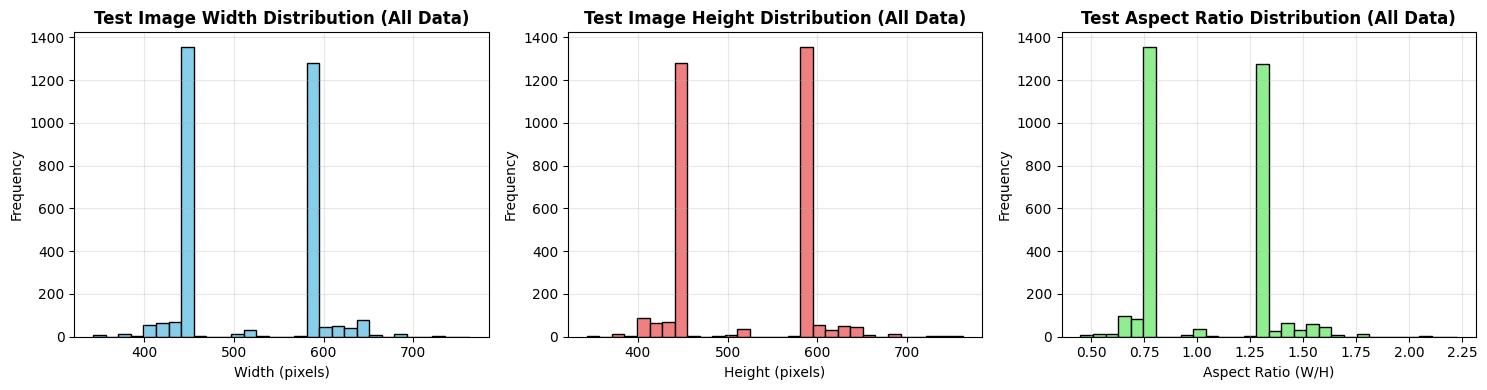

In [42]:
# Analyze ALL test image dimensions
print("=" * 50)
print("📐 Test Image Dimension Analysis (All Data)")
print("=" * 50)

# Get test images
test_images = os.listdir(test_dir)
print(f"\nTotal test images: {len(test_images)}")

test_widths = []
test_heights = []
test_aspects = []

# Analyze ALL test images
for img_name in test_images:
    img_path = os.path.join(test_dir, img_name)
    img = Image.open(img_path)
    w, h = img.size
    test_widths.append(w)
    test_heights.append(h)
    test_aspects.append(w/h)

print(f"\nAnalyzed {len(test_images)} images")
print(f"\nWidth  - Min: {min(test_widths)}, Max: {max(test_widths)}, Mean: {np.mean(test_widths):.1f}")
print(f"Height - Min: {min(test_heights)}, Max: {max(test_heights)}, Mean: {np.mean(test_heights):.1f}")
print(f"Aspect Ratio - Min: {min(test_aspects):.2f}, Max: {max(test_aspects):.2f}, Mean: {np.mean(test_aspects):.2f}")

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].hist(test_widths, bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Test Image Width Distribution (All Data)', fontweight='bold')
axes[0].set_xlabel('Width (pixels)')
axes[0].set_ylabel('Frequency')
axes[0].grid(alpha=0.3)

axes[1].hist(test_heights, bins=30, color='lightcoral', edgecolor='black')
axes[1].set_title('Test Image Height Distribution (All Data)', fontweight='bold')
axes[1].set_xlabel('Height (pixels)')
axes[1].set_ylabel('Frequency')
axes[1].grid(alpha=0.3)

axes[2].hist(test_aspects, bins=30, color='lightgreen', edgecolor='black')
axes[2].set_title('Test Aspect Ratio Distribution (All Data)', fontweight='bold')
axes[2].set_xlabel('Aspect Ratio (W/H)')
axes[2].set_ylabel('Frequency')
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

📊 Image Size by Target Class (All Data)
    target  count  avg_width  avg_height  avg_aspect
0        0    100     482.96  551.030000    0.907407
1        1     46     443.00  591.000000    0.749577
2        2    100     588.04  445.960000    1.322396
3        3    100     443.00  591.000000    0.749577
4        4    100     443.00  591.000000    0.749577
5        5    100     611.81  431.690000    1.441566
6        6    100     499.21  535.380000    0.973501
7        7    100     443.00  591.000000    0.749577
8        8    100     613.43  430.960000    1.449522
9        9    100     608.98  432.560000    1.425421
10      10    100     443.00  591.000000    0.749577
11      11    100     519.96  514.040000    1.053522
12      12    100     443.00  591.000000    0.749577
13      13     74     443.00  590.986486    0.749594
14      14     50     443.00  591.000000    0.749577
15      15    100     444.48  589.510000    0.755435
16      16    100     475.56  558.440000    0.878169


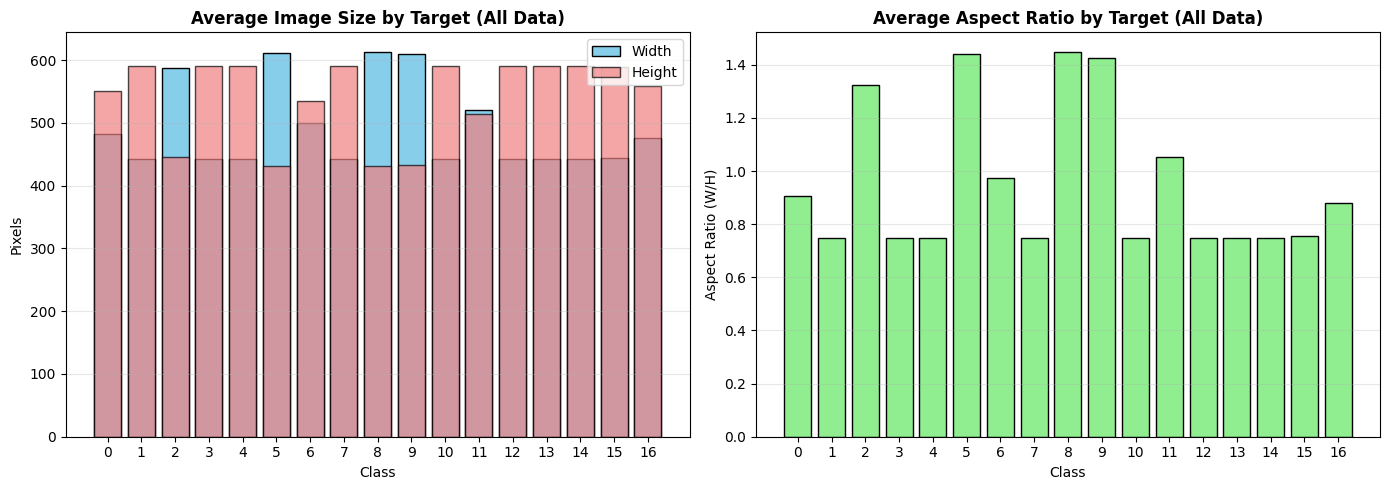

In [43]:
# Check image size for ALL images by target class
print("=" * 50)
print("📊 Image Size by Target Class (All Data)")
print("=" * 50)

target_size_data = []

for target_val in sorted(train_df['target'].unique()):
    target_imgs = train_df[train_df['target'] == target_val]['ID'].values  # All images
    
    target_widths = []
    target_heights = []
    
    for img_id in target_imgs:
        img = Image.open(os.path.join(train_dir, img_id))
        w, h = img.size
        target_widths.append(w)
        target_heights.append(h)
    
    target_size_data.append({
        'target': target_val,
        'count': len(target_imgs),
        'avg_width': np.mean(target_widths),
        'avg_height': np.mean(target_heights),
        'avg_aspect': np.mean([w/h for w, h in zip(target_widths, target_heights)])
    })

size_df = pd.DataFrame(target_size_data)
print(size_df.to_string())

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Average Size
axes[0].bar(size_df['target'], size_df['avg_width'], color='skyblue', edgecolor='black', label='Width')
axes[0].bar(size_df['target'], size_df['avg_height'], color='lightcoral', edgecolor='black', alpha=0.7, label='Height')
axes[0].set_title('Average Image Size by Target (All Data)', fontweight='bold')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Pixels')
axes[0].set_xticks(size_df['target'])  # 모든 클래스 번호 표시
axes[0].set_xticklabels(size_df['target'])  # 0, 1, 2, 3, ...
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Plot 2: Aspect Ratio
axes[1].bar(size_df['target'], size_df['avg_aspect'], color='lightgreen', edgecolor='black')
axes[1].set_title('Average Aspect Ratio by Target (All Data)', fontweight='bold')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Aspect Ratio (W/H)')
axes[1].set_xticks(size_df['target'])  # 모든 클래스 번호 표시
axes[1].set_xticklabels(size_df['target'])  # 0, 1, 2, 3, ...
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

🎨 RGB Channel Distribution Analysis (All Data)

Analyzed 1570 images

Red Channel   - Mean: 146.46, Std: 35.08
Green Channel - Mean: 148.74, Std: 35.81
Blue Channel  - Mean: 149.99, Std: 35.98
Brightness    - Mean: 148.40, Std: 35.29


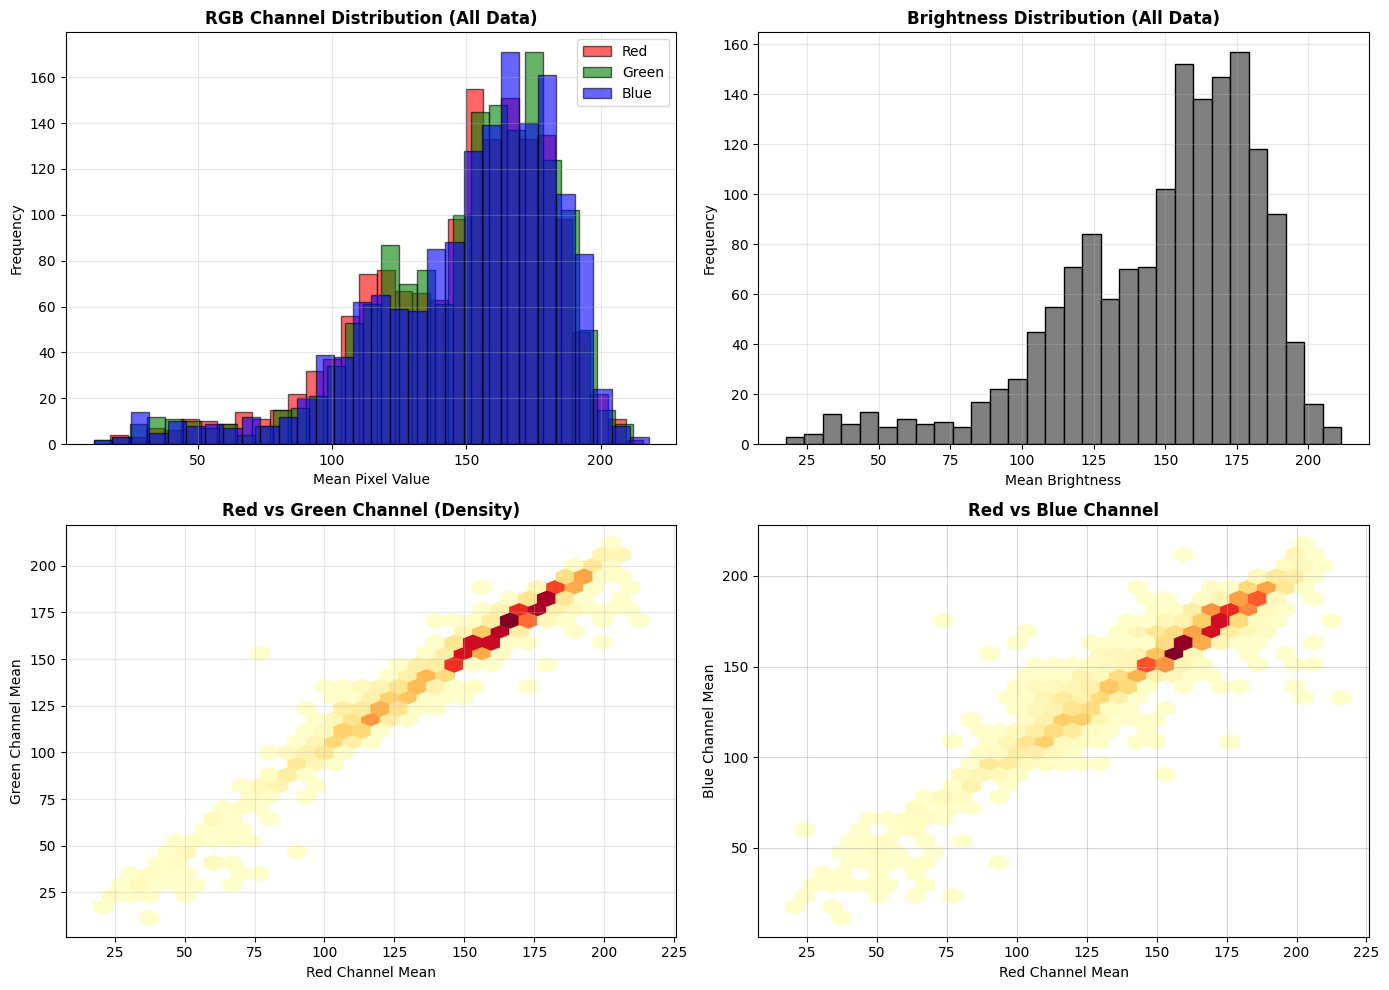

In [44]:
# RGB Channel Distribution Analysis - ALL IMAGES
print("=" * 50)
print("🎨 RGB Channel Distribution Analysis (All Data)")
print("=" * 50)

# Analyze ALL train images
r_values = []
g_values = []
b_values = []
brightness = []

for img_id in train_df['ID'].values:
    img = Image.open(os.path.join(train_dir, img_id)).convert('RGB')
    img_array = np.array(img)
    
    # Get mean values for each channel
    r_values.append(img_array[:, :, 0].mean())
    g_values.append(img_array[:, :, 1].mean())
    b_values.append(img_array[:, :, 2].mean())
    
    # Brightness (grayscale average)
    brightness.append(img_array.mean())

print(f"\nAnalyzed {len(train_df)} images")
print(f"\nRed Channel   - Mean: {np.mean(r_values):.2f}, Std: {np.std(r_values):.2f}")
print(f"Green Channel - Mean: {np.mean(g_values):.2f}, Std: {np.std(g_values):.2f}")
print(f"Blue Channel  - Mean: {np.mean(b_values):.2f}, Std: {np.std(b_values):.2f}")
print(f"Brightness    - Mean: {np.mean(brightness):.2f}, Std: {np.std(brightness):.2f}")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# RGB Distribution
axes[0, 0].hist(r_values, bins=30, color='red', alpha=0.6, label='Red', edgecolor='black')
axes[0, 0].hist(g_values, bins=30, color='green', alpha=0.6, label='Green', edgecolor='black')
axes[0, 0].hist(b_values, bins=30, color='blue', alpha=0.6, label='Blue', edgecolor='black')
axes[0, 0].set_title('RGB Channel Distribution (All Data)', fontweight='bold')
axes[0, 0].set_xlabel('Mean Pixel Value')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Brightness Distribution
axes[0, 1].hist(brightness, bins=30, color='gray', edgecolor='black')
axes[0, 1].set_title('Brightness Distribution (All Data)', fontweight='bold')
axes[0, 1].set_xlabel('Mean Brightness')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(alpha=0.3)

axes[1, 0].hexbin(r_values, g_values, gridsize=30, cmap='YlOrRd', mincnt=1)
axes[1, 0].set_title('Red vs Green Channel (Density)', fontweight='bold')
axes[1, 0].set_xlabel('Red Channel Mean')
axes[1, 0].set_ylabel('Green Channel Mean')
axes[1, 0].grid(alpha=0.3)

# RGB Scatter (R vs B) - 실제 색상 반영
axes[1, 1].hexbin(r_values, b_values, gridsize=30, cmap='YlOrRd', mincnt=1)
axes[1, 1].set_title('Red vs Blue Channel (Density)', fontweight='bold')
axes[1, 1].set_title('Red vs Blue Channel', fontweight='bold')
axes[1, 1].set_xlabel('Red Channel Mean')
axes[1, 1].set_ylabel('Blue Channel Mean')
axes[1, 1].grid(alpha=0.5)

plt.tight_layout()
plt.show()

🎨 RGB Channel Distribution Analysis - TEST (All Data)

Analyzed 3140 images

Red Channel   - Mean: 171.14, Std: 34.73
Green Channel - Mean: 172.54, Std: 34.73
Blue Channel  - Mean: 173.21, Std: 34.33
Brightness    - Mean: 172.30, Std: 34.45


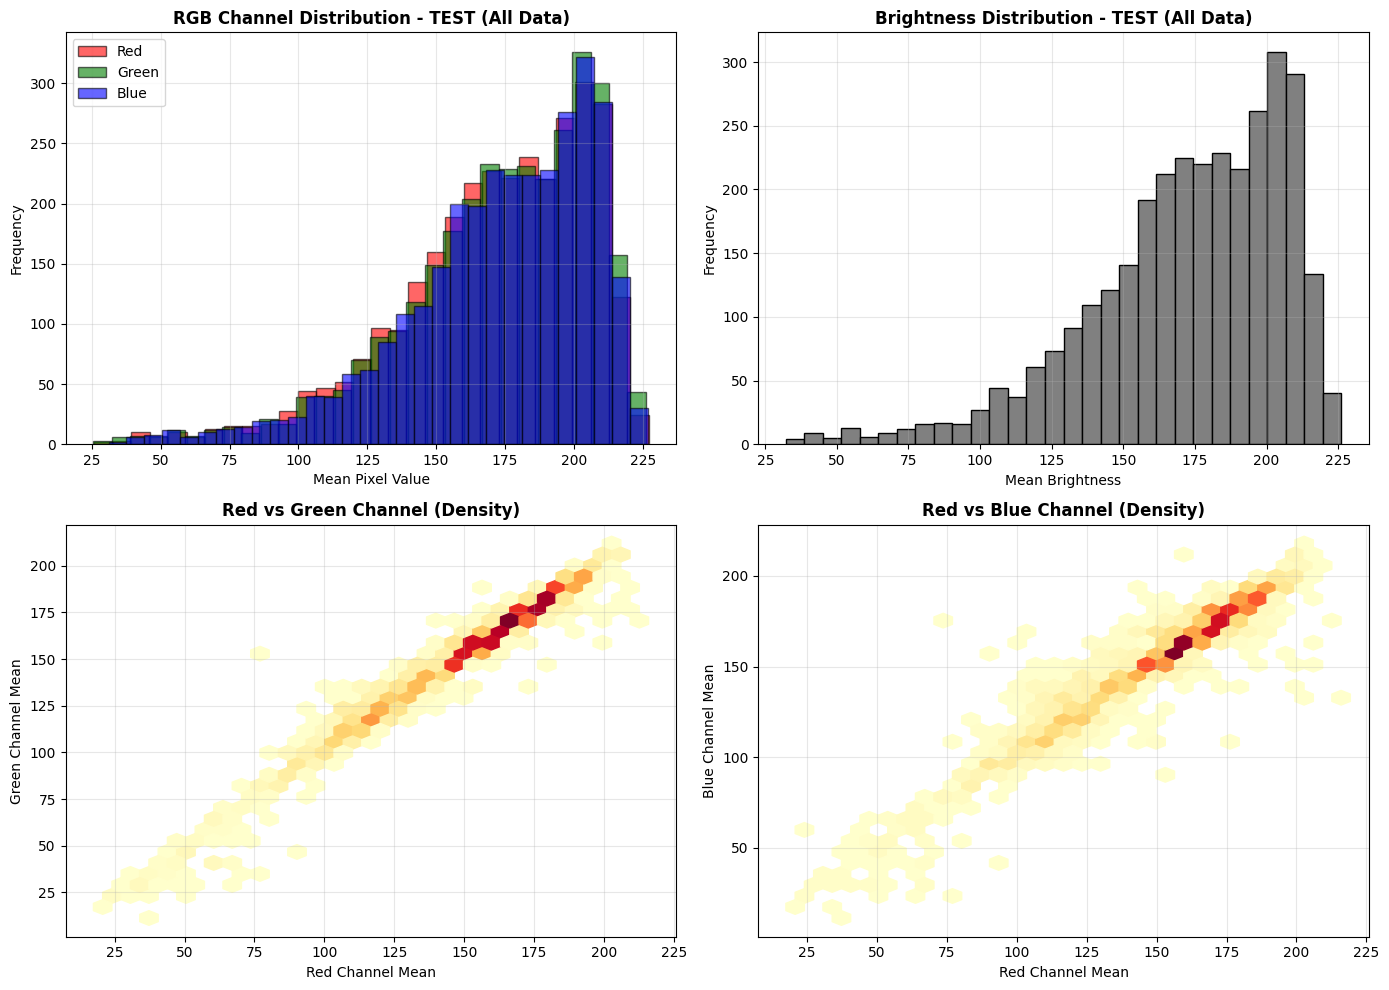

In [45]:
# RGB Channel Distribution Analysis - TEST DATA
print("=" * 50)
print("🎨 RGB Channel Distribution Analysis - TEST (All Data)")
print("=" * 50)

# ✅ 변경 1: test_dir에서 이미지 파일 리스트 가져오기
test_images = os.listdir(test_dir)

test_r_values = []
test_g_values = []
test_b_values = []
test_brightness = []

# ✅ 변경 2: test_images 리스트를 순회
for img_id in test_images:
    # ✅ 변경 3: test_dir 경로 사용
    img = Image.open(os.path.join(test_dir, img_id)).convert('RGB')
    img_array = np.array(img)
    
    # Get mean values for each channel
    test_r_values.append(img_array[:, :, 0].mean())
    test_g_values.append(img_array[:, :, 1].mean())
    test_b_values.append(img_array[:, :, 2].mean())
    
    # Brightness (grayscale average)
    test_brightness.append(img_array.mean())

# ✅ 변경 4: 변수명에 test_ 접두사 사용
print(f"\nAnalyzed {len(test_images)} images")
print(f"\nRed Channel   - Mean: {np.mean(test_r_values):.2f}, Std: {np.std(test_r_values):.2f}")
print(f"Green Channel - Mean: {np.mean(test_g_values):.2f}, Std: {np.std(test_g_values):.2f}")
print(f"Blue Channel  - Mean: {np.mean(test_b_values):.2f}, Std: {np.std(test_b_values):.2f}")
print(f"Brightness    - Mean: {np.mean(test_brightness):.2f}, Std: {np.std(test_brightness):.2f}")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# RGB Distribution
axes[0, 0].hist(test_r_values, bins=30, color='red', alpha=0.6, label='Red', edgecolor='black')
axes[0, 0].hist(test_g_values, bins=30, color='green', alpha=0.6, label='Green', edgecolor='black')
axes[0, 0].hist(test_b_values, bins=30, color='blue', alpha=0.6, label='Blue', edgecolor='black')
axes[0, 0].set_title('RGB Channel Distribution - TEST (All Data)', fontweight='bold')  # ✅ 변경 5: 제목에 TEST 추가
axes[0, 0].set_xlabel('Mean Pixel Value')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Brightness Distribution
axes[0, 1].hist(test_brightness, bins=30, color='gray', edgecolor='black')
axes[0, 1].set_title('Brightness Distribution - TEST (All Data)', fontweight='bold')
axes[0, 1].set_xlabel('Mean Brightness')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(alpha=0.3)

# RGB Scatter (R vs G)
axes[1, 0].hexbin(r_values, g_values, gridsize=30, cmap='YlOrRd', mincnt=1)
axes[1, 0].set_title('Red vs Green Channel (Density)', fontweight='bold')
axes[1, 0].set_xlabel('Red Channel Mean')
axes[1, 0].set_ylabel('Green Channel Mean')
axes[1, 0].grid(alpha=0.3)

# RGB Scatter (R vs B)
axes[1, 1].hexbin(r_values, b_values, gridsize=30, cmap='YlOrRd', mincnt=1)
axes[1, 1].set_title('Red vs Blue Channel (Density)', fontweight='bold')
axes[1, 1].set_xlabel('Red Channel Mean')
axes[1, 1].set_ylabel('Blue Channel Mean')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()